In [1]:
from importlib import reload
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../../../autoencoder/")

In [2]:
import dataset
reload(dataset)
import dataset
from dataset import CountDataModule

In [3]:
dls = CountDataModule(
        adata="../counts.h5ad.gzip",
        batch_size=128,
        n_gene=3072,
        gene_filter="highly_variable_rank",
        scale_type="StandardScaler",
        p_gene_dropout=0.,
        train_val_test_lengths=[0.8, 0.2, 0.0],
        num_workers=5,
)
dls.setup()

/home/saverio/tirocinio/ENV/lib/python3.10/site-packages/torch/utils/data/dataset.py:342: UserWarning: Length of split at index 2 is 0. This might result in an empty dataset.
  warnings.warn(f"Length of split at index {i} is 0. "


In [4]:
dls.adata.var[["GDI", "highly_variable_rank"]].corr()

GDI  highly_variable_rank
GDI                   1.000000             -0.403819
highly_variable_rank -0.403819              1.000000

In [4]:
import module
reload(module)
import module
from module import AutoencoderNB

In [5]:
torch.manual_seed(1)
autoencoder = AutoencoderNB(
    n_input=dls.adata.n_vars, 
    n_latent=24, 
    layers_dim=[128, 64, 64], 
    library_layers_dim=[128, 128]
)

logger = pl.loggers.CSVLogger("log", name="train_1000")
trainer = pl.Trainer(accelerator="gpu", devices=1, max_epochs=20, logger=logger)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [6]:
trainer.fit(autoencoder, datamodule=dls)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]

  | Name      | Type       | Params
-----------------------------------------
0 | encoder   | MyEncoder  | 408 K 
1 | decoder   | MyDecoder  | 806 K 
2 | l_encoder | MyFCLayers | 409 K 
-----------------------------------------
1.6 M     Trainable params
0         Non-trainable params
1.6 M     Total params
6.502     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


In [13]:
history

val_nb_loss  val_kl_loss  val_recall  val_crossentropy  step  \
epoch                                                                 
0         0.080510     0.059332    0.301399               inf   428   
0              NaN          NaN         NaN               NaN   428   
1         0.075218     0.091020    0.354376          0.050404   857   
1              NaN          NaN         NaN               NaN   857   
2         0.074085     0.091577    0.358621          0.049643  1286   
2              NaN          NaN         NaN               NaN  1286   
3         0.073173     0.098604    0.362860          0.048988  1715   
3              NaN          NaN         NaN               NaN  1715   
4         0.072811     0.099091    0.367727          0.048727  2144   
4              NaN          NaN         NaN               NaN  2144   
5         0.072465     0.105102    0.364647          0.048479  2573   
5              NaN          NaN         NaN               NaN  2573   
6         0.072153     0.110493    0.367804          0.048277  3002   
6              NaN          NaN         NaN               NaN  3002   
7         0.071975     0.111988    0.371812          0.048159  3431   
7              NaN          NaN         NaN               NaN  3431   
8         0.071827     0.116424    0.373843          0.048058  3860   
8              NaN          NaN         NaN               NaN  3860   
9         0.071665     0.118407    0.372757          0.047943  4289   
9              NaN          NaN         NaN               NaN  4289   
10        0.071549     0.121862    0.372105          0.047847  4718   
10             NaN          NaN         NaN               NaN  4718   
11        0.071452     0.122497    0.373364          0.047788  5147   
11             NaN          NaN         NaN               NaN  5147   
12        0.071403     0.128046    0.375476          0.047749  5576   
12             NaN          NaN         NaN               NaN  5576   
13        0.071352     0.127147    0.379156          0.047711  6005   
13             NaN          NaN         NaN               NaN  6005   
14        0.071289     0.129238    0.379400          0.047669  6434   
14             NaN          NaN         NaN               NaN  6434   
15        0.071298     0.127643    0.375554          0.047672  6863   
15             NaN          NaN         NaN               NaN  6863   
16        0.071211     0.128276    0.378223          0.047619  7292   
16             NaN          NaN         NaN               NaN  7292   
17        0.071207     0.130285    0.376519          0.047617  7721   
17             NaN          NaN         NaN               NaN  7721   
18        0.071178     0.130671    0.377322          0.047584  8150   
18             NaN          NaN         NaN               NaN  8150   
19        0.071171     0.132100    0.376493          0.047588  8579   
19             NaN          NaN         NaN               NaN  8579   

       train_nb_loss  train_kl_loss  train_recall  train_crossentropy  
epoch                                                                  
0                NaN            NaN           NaN                 NaN  
0           0.087072       0.068766      0.275938                 inf  
1                NaN            NaN           NaN                 NaN  
1           0.076054       0.084594      0.336636            0.051053  
2                NaN            NaN           NaN                 NaN  
2           0.074507       0.087405      0.352401                 inf  
3                NaN            NaN           NaN                 NaN  
3           0.073638       0.096323      0.358490                 inf  
4                NaN            NaN           NaN                 NaN  
4           0.073111       0.100890      0.361894            0.048964  
5                NaN            NaN           NaN                 NaN  
5           0.072747       0.104373      0.365338                 inf  
6               

<AxesSubplot: xlabel='epoch'>

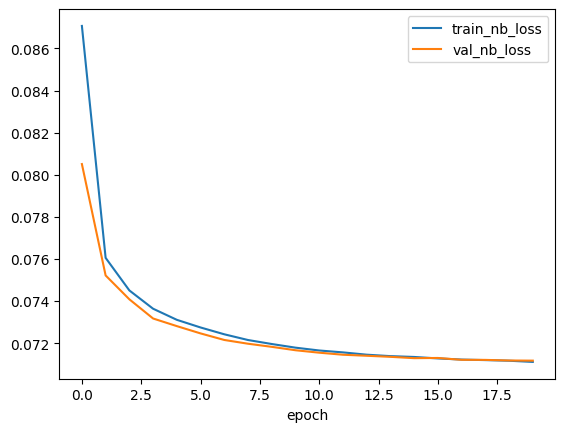

In [15]:
history = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv", index_col="epoch")
axe=history.groupby(level=0).mean()[["train_nb_loss", "val_nb_loss"]].plot.line()
#axe.set_ylim((1000,1025))
axe

In [16]:
predictions = trainer.predict(autoencoder, datamodule=dls)
predictions_m = np.vstack([batch[0] for batch in predictions])

/home/saverio/tirocinio/ENV/lib/python3.10/site-packages/torch/utils/data/dataset.py:342: UserWarning: Length of split at index 2 is 0. This might result in an empty dataset.
  warnings.warn(f"Length of split at index {i} is 0. "
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 429it [00:00, ?it/s]

In [39]:
import plot
reload(plot)
import plot
from plot import joinplot_pca

In [17]:
adata_latent = an.AnnData(
    predictions_m,
)
adata_latent.obs_names = dls.adata.obs_names
adata_latent.uns = dls.adata.uns
adata_latent.obs = dls.adata.obs
sc.pp.pca(adata_latent)
adata_latent

AnnData object with n_obs × n_vars = 68579 × 24
    obs: 'celltype'
    uns: 'celltype_colors', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

/home/saverio/tirocinio/ENV/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


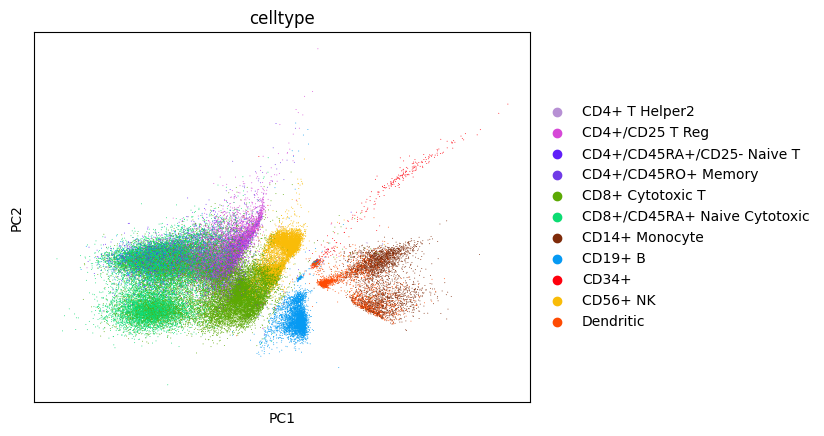

In [18]:
adata_latent.obs["celltype"] = dls.adata.obs["celltype"]
sc.pp.pca(adata_latent, n_comps=2)
sc.pl.pca(adata_latent, color='celltype')

In [19]:
import plotly.graph_objs as go

In [23]:
adata_latent.obsm["X_pca"].to_df()

AttributeError: 'numpy.ndarray' object has no attribute 'to_df'

In [27]:
f1 = go.FigureWidget()
scatt = f1.add_scatter(
    x=adata_latent.obsm["X_pca"][:,0],
    y=adata_latent.obsm["X_pca"][:,1]
)scatt1.mode = 'markers'


scatt.show()